y=1.438592*ln(x)+-0.634134


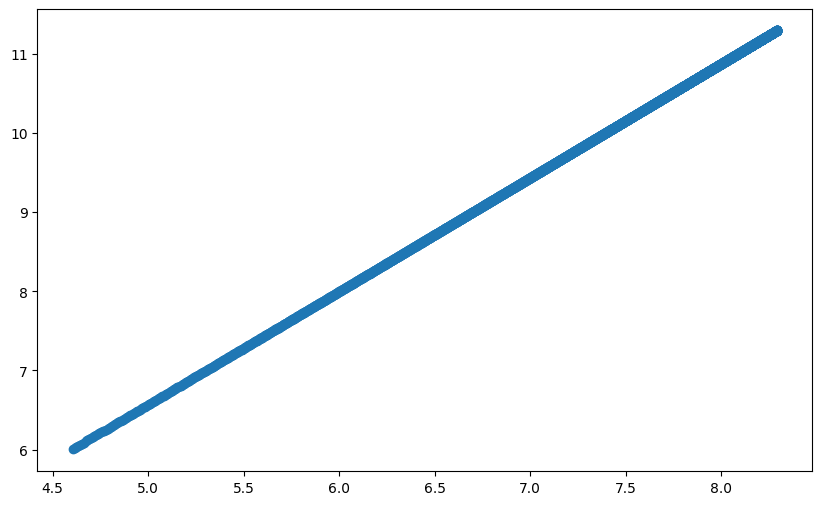

In [61]:
#an attempt to code 
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import linregress
def index(k,i):
    return int(k*(k+1)/2+i)
n=40
N=int(n*(n+1)/2)
M=np.zeros((N,N))
M[2][0]=1
for k in range(1,n):
    for i in range(k):
        M[index(k,i+1)][index(k,i)]=0.5
        M[index(k,0)][index(k,i)]=0.5
    M[index(k,0)][index(k,k)]=0.5
    if k!=n-1: M[index(k+1,k+1)][index(k,k)]=0.5
vect=np.zeros((N,1))
vect[0][0]=1
weigh=np.zeros(1)
for k in range(1,n):
    weigh=np.hstack((weigh,k*np.ones(k+1)))
weigh=weigh.reshape(1,N)
result=np.array([0])
for j in range(1,4000):
    vect=M@vect
    expec=np.inner(weigh,vect.T)
    result=np.append(result,expec)
result=result[100::]
plt.figure(figsize=(10,6))
plt.scatter(np.log(np.arange(100,4000)),result)
slope,intercept=np.polyfit(np.log(np.arange(100,4000)),result,1)#
print("y=%f*ln(x)+%f" %(slope,intercept))
plt.plot(np.log(np.arange(100,4000)),slope*np.log(np.arange(100,4000))+intercept)
plt.show()

In [15]:
import numpy as np
A=np.ones((2,1))
print(A)
B=A.reshape(1,2)
print(B)
print(np.inner(B,A.T))#row.row=1.1matrix
c=np.array([1,2,3])
print(c.T)#useless
print(np.inner(c,c))#number
I1=np.eye(3)
print(np.matmul(I1,c))#can be done
print(I1@c)#also be done
#np.testing.assert_allclose(f_y,ey, atol=1e-8) (compare matrix)
#np.allclose(value1, value3, atol=1e-8)（compare number）
#result00[i]=calculation(0,0,data[i]).real  complex->real
#N=int(n*(n+1)/2)  real to int



[[1.]
 [1.]]
[[1. 1.]]
[[2.]]
[1 2 3]
14
[1. 2. 3.]
[1. 2. 3.]


data: {'0': 522, '1': 502}
detail info: {'id': 'ccbd3af0-fb10-418d-99b0-f38e9a2de1c1', 'state': 'completed', 'at': 1721119668426872.5, 'shots': 1024, 'device': 'testing', 'results': {'0': 522, '1': 502}}
   ┌───┐┌───────┐
q: ┤ H ├┤ Rz(0) ├
   └───┘└───────┘


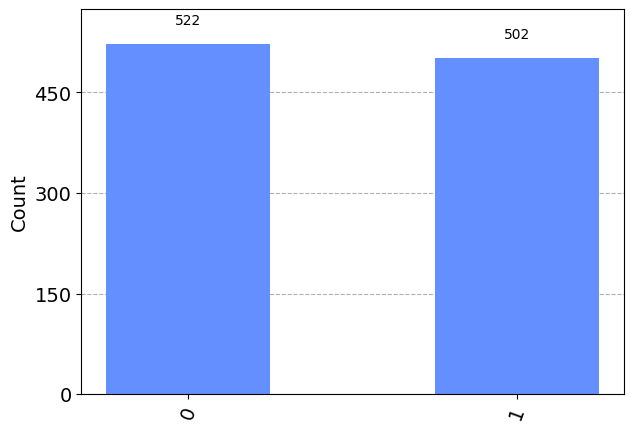

In [6]:
#solutions for question 1
import tensorcircuit as tc
from tensorcircuit.cloud import apis
apis.set_provider("local")

# 调用本地code进行电路模拟
c = tc.Circuit(1)
c.H(0)
c.rz(0, theta=0)
U = c.matrix() # 量子门电路对应的矩阵
states = c.state() # 输出量子态
t = apis.submit_task(circuit=c, device="testing", shots=1024)
data = t.results(blocked=True) #产生0，1态的结果分布
print('data:', data)
detail = t.details() # 产生详细的参数信息
print("detail info:", t.details())

print(c.draw()) #电路可视化图像输出,可选 c.draw(output='mpl')
counts = t.results()
tc.results.counts.plot_histogram(counts) #柱状结果分布

[ 0.8660254 -0.5      ]


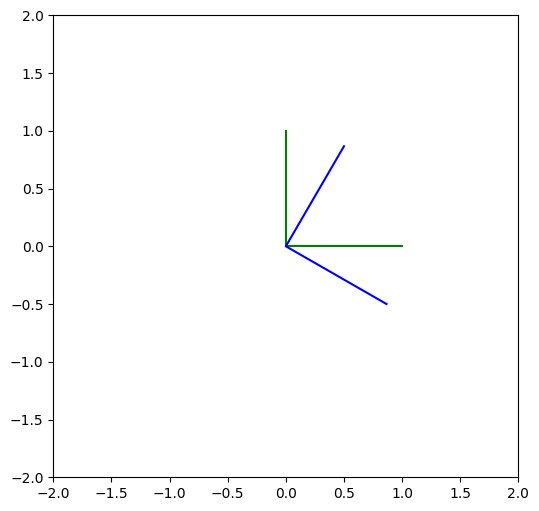

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt 
#solutions for question 2.1
v=np.array([1,0])
u=np.array([0,1])
theta=math.pi/6
rtheta=np.array([[math.cos(theta),math.sin(theta)],[-math.sin(theta),math.cos(theta)]])
v1=np.matmul(rtheta,v)
u1=np.matmul(rtheta,u)
print(v1)    

plt.axis([-2,2,-2,2])
plt.plot([v[0],0,u[0]],[v[1],0,u[1]],'-g',label='original')
plt.plot([v1[0],0,u1[0]],[v1[1],0,u1[1]],'-b',label='after operation')
plt.show()
#顺时针旋转了theta角

In [52]:
#solutions for question 2.2
import numpy as np
import math
import matplotlib.pyplot as plt 
J=np.array([[1j,0],[0,1j]])
x=np.array([[0,1],[1,0]])
y=np.array([[0,-1j],[1j,0]])
z=np.array([[1,0],[0,-1]])
ex=np.exp(J@x)
f_x=np.add(np.cos(x),J@np.sin(x))
print(ex)
print(f_x)
np.testing.assert_allclose(f_x,ex, atol=1e-8)
#test others
ey=np.exp(J@y)
ez=np.exp(J@z)
f_y=np.add(np.cos(y),J@np.sin(y))
f_z=np.add(np.cos(z),J@np.sin(z))
np.testing.assert_allclose(f_y,ey, atol=1e-8)
np.testing.assert_allclose(f_z,ez, atol=1e-8)
#simple proof
#e^(jx)=\sum_{k=0}^{+\infty}(jx)^k
#=\sum_{k=0}^{+\infty}(jx)^(2k+1)+\sum_{k=0}^{+\infty}(jx)^(2k)
#=j*\sum_{k=0}^{+\infty}(-1)^kx^(2k+1)+\sum_{k=0}^{+\infty}(-1)^kx^(2k)
#=j*sin(x)+cos(x).
#证明过程要求各部分泰勒展开成立

[[1.        +0.j         0.54030231+0.84147098j]
 [0.54030231+0.84147098j 1.        +0.j        ]]
[[1.        +0.j         0.54030231+0.84147098j]
 [0.54030231+0.84147098j 1.        +0.j        ]]


(0.3296799539643608+0j)


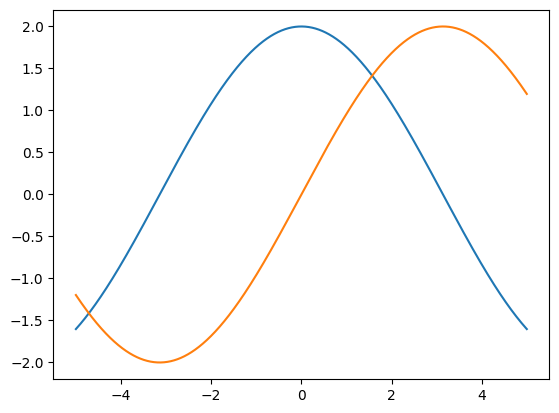

In [1]:
#solutions for question 2.3
import numpy as np
import math
import matplotlib.pyplot as plt 
def matrix(num):
    if num==0:
        return np.array([[0,1],[1,0]])
    elif num==1:return np.array([[0,-1j],[1j,0]])
    else:return np.array([[1,0],[0,-1]])
def calculation(num1,num2,theta):
    P=matrix(num1)
    Q=matrix(num2)
    v0=np.array([1,0])
    const1=theta*0.5j
    v=np.exp(const1*P)@v0
    ans=np.inner(v.conj(),Q@v.T)
    return ans
print(calculation(1,2,0.4))
data = np.linspace(-5, 5, 2000)
result01=np.zeros(2000)
result00=np.zeros(2000)
for i in range(2000):
    result01[i]=calculation(0,1,data[i]).real
    result00[i]=calculation(0,0,data[i]).real
plt.plot(data,result00)
plt.plot(data,result01)
plt.show()#(0,0)和(0,1)

In [11]:
#solutions for question 2.4
x=np.array([[0,1],[1,0]])
z=np.array([[1,0],[0,-1]])
def kronmatr(num,m,A):
    H1=np.eye(2**m)
    H1=np.kron(H1,A)
    H1=np.kron(H1,np.eye(2**(num-1-m)))
    return H1
def hx(num):
    H0=np.zeros((2**num,2**num))
    for i in range(num):
        H0=H0+kronmatr(num,i,z)
    for i in range(num-1):
        H0=H0+kronmatr(num,i,x)@kronmatr(num,i+1,x)
    return H0
e=hx(4)
print(e[0][0])
    
    
    

4.0


In [9]:
#solutions for question 2.5
#期望定义为<v|Q|v>
#|00...0>经过上题变换后得到n|00...0>+|110...0>+|0110...0>+\cdots+|00...11>
#题目对应向量为（0,0,1/sqrt(2),0,0,1/sqrt(2),0,0）^T

D:\anaconda\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


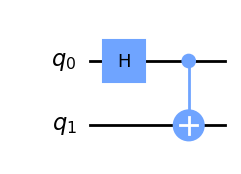

In [108]:
#solutions for question 3
import tensorcircuit as tc
import numpy as np
from tensorcircuit.cloud import apis
apis.set_provider("local")
c = tc.Circuit(2)
c.h(0)
c.cx(0, 1)
state1=c.state()
rou=state1.reshape(4,1)@state1.reshape(1,4)#density matrix
value1=c.expectation([tc.gates.z(), [0]], [tc.gates.z(), [1]])
Z0Z1=np.kron(np.array([[1,0],[0,-1]]),np.array([[1,0],[0,-1]]))
value2=np.trace(rou@Z0Z1)
np.allclose(value1, value2, atol=1e-8)#the answer is same
#for 3.2
#simulation
n=1000
freq=np.zeros(4)
for i in range(n):
    res=c.measure(0, 1, with_prob=False)
    index=int(res[0][0]*2+res[0][1])#being a proper index
    freq[index]=freq[index]+1
value3=freq@np.array([1,-1,-1,1])
value3=value3/n
np.allclose(value1, value3, atol=1e-8)#the result is exactly 1
c.draw(output='mpl')